<a href="https://colab.research.google.com/github/cheung0/California-Air-Quality-Prediction/blob/main/Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Some information about what air quality is. Pretty self explanatory. Good air quality = good. Bad air quality = not good. Let's see if we can find any trends or patterns that can help us make informed decisions about when to open windows or wear masks outside.

# Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score

# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/Los Angeles Air Quality 2010-2022.csv')
# df = pd.read_csv('/Alameda County Air Quality.csv')
# df = pd.read_csv('/Los Angeles Air Quality.csv')
# df = pd.read_csv('/California Air Quality.csv')
# df = pd.read_csv('/Bay Area Air Quality.csv')

In [6]:
selected_columns = ['Date', 'Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE', 'Day Of Week']
df = df[selected_columns]

# Exploratory Data Analysis

In [7]:
# get statistics of csv file
df.describe()

,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
count,54347.000000,54347.000000
mean,12.292465,45.852945
std,7.566854,20.870792
min,-2.200000,0.000000
25%,7.500000,31.000000
50%,11.000000,46.000000
75%,15.300000,58.000000
max,175.000000,225.000000


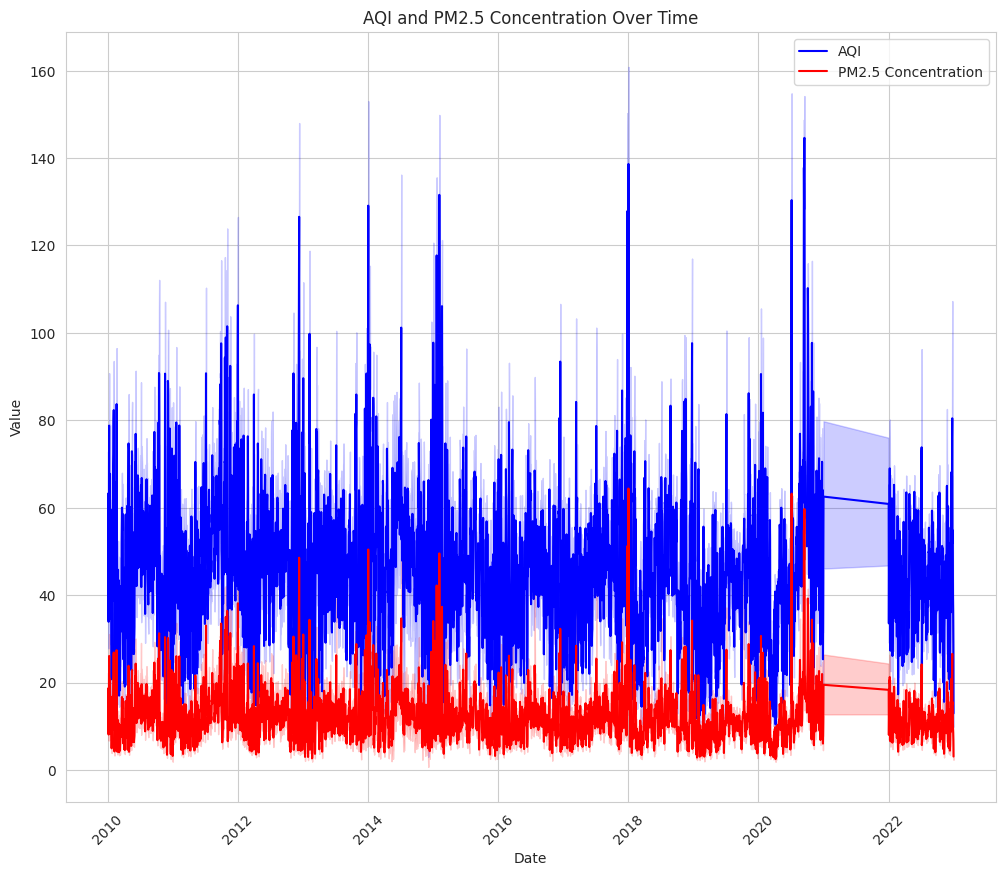

In [5]:
# Convert the "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Plotting
plt.figure(figsize=(12, 10))
sns.lineplot(x="Date", y="DAILY_AQI_VALUE", data=df, color="blue", label="AQI")
sns.lineplot(x="Date", y="Daily Mean PM2.5 Concentration", data=df, color="red", label="PM2.5 Concentration")

# Set x-axis label and title
plt.xlabel("Date")
plt.title("AQI and PM2.5 Concentration Over Time")

# Set y-axis labels
plt.ylabel("Value")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the legend
plt.legend()

# Display the plot
plt.show()

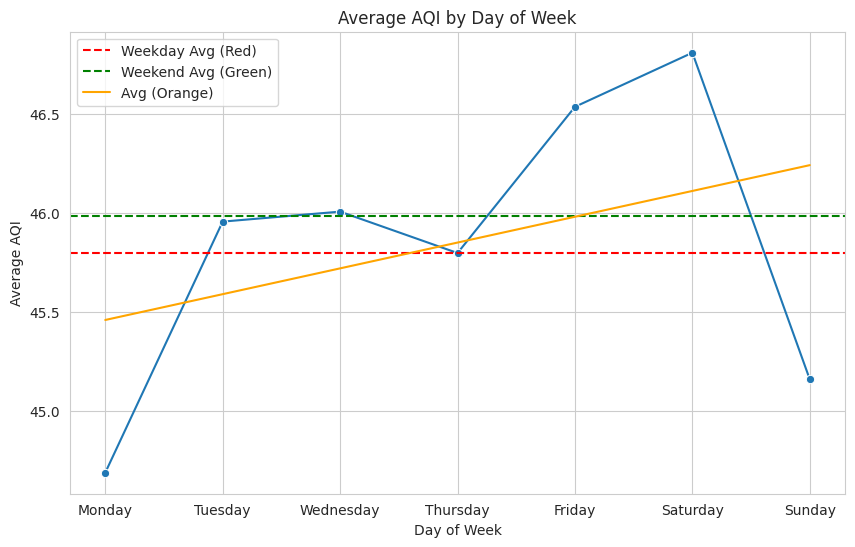

In [8]:
# Line plot

# Group the data by 'Day Of Week' and calculate the average AQI for each day
avg_aqi_by_day = df.groupby('Day Of Week')['DAILY_AQI_VALUE'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_aqi_by_day.reindex(weekday_order), marker='o')

# Calculate the average AQI for weekdays and weekends
avg_weekday_aqi = avg_aqi_by_day[weekday_order[:5]].mean()
avg_weekend_aqi = avg_aqi_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend AQI
plt.axhline(avg_weekday_aqi, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_aqi, color='g', linestyle='--', label='Weekend Avg (Green)')

# Fit a line to the data points
x = np.arange(len(weekday_order))
y = avg_aqi_by_day.reindex(weekday_order)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='orange', label='Avg (Orange)')

# Customize the plot
plt.title('Average AQI by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

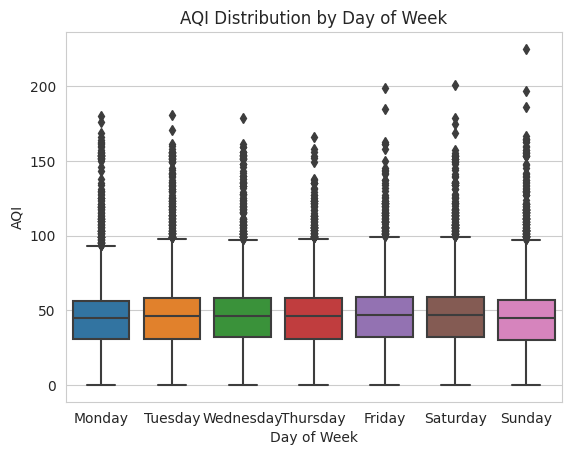

In [3]:
# Box plot

# Define the order of the days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a box plot with the ordered weekdays
sns.set_style('whitegrid')
#plt.figure(figsize=(10, 6))
sns.boxplot(x='Day Of Week', y='DAILY_AQI_VALUE', data=df, order=weekday_order)

# Set the title and labels
plt.title('AQI Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('AQI')

# Show the plot
plt.show()


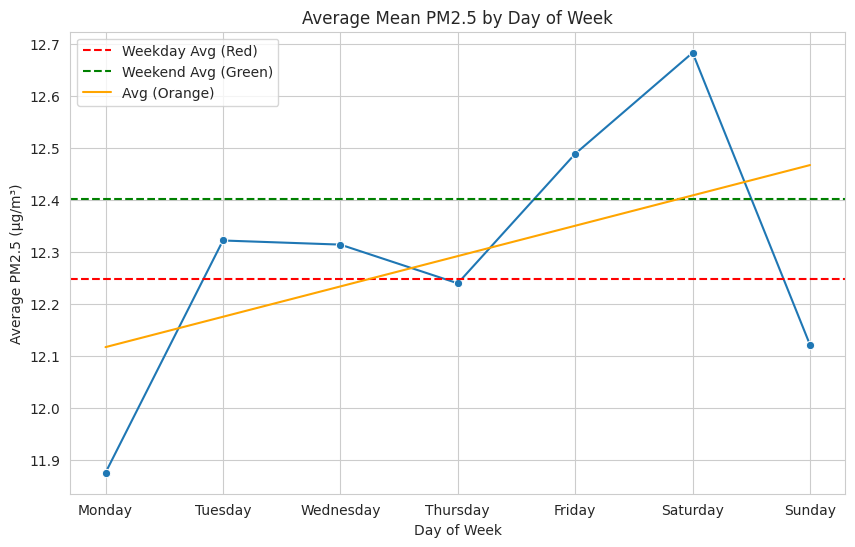

In [9]:
# Group the data by 'Day Of Week' and calculate the average PM2.5 for each day
avg_pm25_by_day = df.groupby('Day Of Week')['Daily Mean PM2.5 Concentration'].mean()

# Define the order of the days of the week for proper sorting on the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot using Seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_pm25_by_day.reindex(weekday_order), marker='o')

# Calculate the average PM2.5 for weekdays and weekends
avg_weekday_pm25 = avg_pm25_by_day[weekday_order[:5]].mean()
avg_weekend_pm25 = avg_pm25_by_day[weekday_order[5:]].mean()

# Add horizontal lines for average weekday and weekend PM2.5
plt.axhline(avg_weekday_pm25, color='r', linestyle='--', label='Weekday Avg (Red)')
plt.axhline(avg_weekend_pm25, color='g', linestyle='--', label='Weekend Avg (Green)')

# Fit a line to the data points
x = np.arange(len(weekday_order))
y = avg_pm25_by_day.reindex(weekday_order)
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color='orange', label='Avg (Orange)')

# Customize the plot
plt.title('Average Mean PM2.5 by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(range(7), weekday_order)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [10]:
print('Average Weekday AQI: {:.3f}'.format(avg_weekday_aqi))
print('Average Weekend AQI: {:.3f}'.format(avg_weekend_aqi))
print('Average Difference: {:.3f}'.format(avg_weekday_aqi - avg_weekend_aqi))

Average Weekday AQI: 45.798
Average Weekend AQI: 45.985
Average Difference: -0.187


In [11]:
print('Average Weekday PM2.5 (µg/m³): {:.3f}'.format(avg_weekday_pm25))
print('Average Weekend PM2.5 (µg/m³): {:.3f}'.format(avg_weekend_pm25))
print('Average Difference (µg/m³): {:.3f}'.format(avg_weekday_pm25 - avg_weekend_pm25))

Average Weekday PM2.5 (µg/m³): 12.248
Average Weekend PM2.5 (µg/m³): 12.402
Average Difference (µg/m³): -0.154


**2022 Observations**

Alameda County csv file contains 1793 values. Average daily AQI is 32. Average mean PM2.5 is 8.2. 

Los Angeles csv file contains 5134 values. Average daily AQI is 43. Average mean PM2.5 is 11.0. 

California csv file contains 56838 values. Average daily AQI is 33. Average mean PM2.5 is 8.6. 

Alameda County air quality is slightly better than California's average. However, Los Angeles' air quality is not good and is near moderate air quality levels.

# Machine Learning

Time series prediction algorithm. Forecast or predict the air quality given past observations of air quality.

Time-step feature - feature we can derive directly from the time index. Most basic is the time dummy, counts from beginning to end. The time dummy lets us fit curves to time series in a time plot.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score

In [13]:
df = pd.read_csv('/Los Angeles Air Quality 2010-2022.csv')
selected_columns = ['Date', 'Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE', 'SITE_LATITUDE', 'SITE_LONGITUDE', 'Day Of Week']
df = df[selected_columns]

In [14]:
# Preprocess the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day Of Week'] = df['Date'].dt.weekday


# Holiday column
import holidays
us_holidays = holidays.US(years=range(2010, 2024))
df['Is_Holiday'] = df['Date'].dt.date.astype('datetime64').isin(us_holidays)
df['Is_Holiday'] = df['Is_Holiday'].astype(int)


# Captures circular nature of weeks
df['day_of_week_sin'] = np.sin(df['Day Of Week'] * (2 * np.pi / 7))
df['day_of_week_cos'] = np.cos(df['Day Of Week'] * (2 * np.pi / 7))


#from sklearn.metrics.pairwise import haversine_distances
import math
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = c

    # Angular distance in radians
    return distance

# Coordinates for the center of Los Angeles
lat1 = 34.0522
lon1 = -118.2437
df['AngularDistance'] = df.apply(lambda row: haversine_distance(row['SITE_LATITUDE'], row['SITE_LONGITUDE'], lat1, lon1), axis=1)


# Define the features and target variable
df_features = ['Daily Mean PM2.5 Concentration', 'Year', 'Month', 'Day', 'Day Of Week', 
               'Is_Holiday', 'day_of_week_sin', 'day_of_week_cos', 'AngularDistance',
               'SITE_LATITUDE', 'SITE_LONGITUDE']
X = df[df_features]
y = df['DAILY_AQI_VALUE']

In [18]:
df.head()

,Date,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,SITE_LATITUDE,SITE_LONGITUDE,Day Of Week,Year,Month,Day,Is_Holiday,day_of_week_sin,day_of_week_cos,AngularDistance
0,2010-01-01,15.9,59,34.06659,-118.22688,4,2010,1,1,1,-0.433884,-0.900969,0.000350
1,2010-01-01,26.5,81,33.79236,-118.17533,4,2010,1,1,1,-0.433884,-0.900969,0.004642
2,2010-01-01,5.8,24,34.38344,-118.52840,4,2010,1,1,1,-0.433884,-0.900969,0.007093
3,2010-01-01,13.1,53,34.06659,-118.22688,4,2010,1,1,1,-0.433884,-0.900969,0.000350
4,2010-01-01,21.8,71,34.17605,-118.31712,4,2010,1,1,1,-0.433884,-0.900969,0.002408


In [ ]:
# Create the XGBoost regressor
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Show feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
# Zip the feature importances and feature names together
importance_scores = zip(df_features, feature_importances)
# Sort the importance scores in descending order
sorted_importance_scores = sorted(importance_scores, key=lambda x: x[1], reverse=True)
# Print the feature importances with their names
for feature, importance in sorted_importance_scores:
    print(f"{feature}: {importance}")

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the XGBoost regressor
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Show feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
# Zip the feature importances and feature names together
importance_scores = zip(df_features, feature_importances)
# Sort the importance scores in descending order
sorted_importance_scores = sorted(importance_scores, key=lambda x: x[1], reverse=True)
# Print the feature importances with their names
for feature, importance in sorted_importance_scores:
    print(f"{feature}: {importance}")

# model.feature_importances_

Daily Mean PM2.5 Concentration: 0.9999145269393921
SITE_LONGITUDE: 3.3716714824549854e-05
Day Of Week: 1.7318256141152233e-05
day_of_week_sin: 1.1740215995814651e-05
AngularDistance: 7.2193920459540095e-06
Day: 6.5433787312940694e-06
Year: 3.832918082480319e-06
SITE_LATITUDE: 3.2329357964044902e-06
day_of_week_cos: 1.5760339238113374e-06
Month: 2.809093189171108e-07
Is_Holiday: 3.270352522122266e-08


In [20]:
from sklearn.feature_selection import RFE

# Define your X and y data
X = df[df_features]
y = df['DAILY_AQI_VALUE']

# Create the estimator/model
#estimator = LinearRegression()
estimator = xgb.XGBRegressor()

# Specify the number of features to select
#n_features_to_select = 5

# Perform RFE
rfe = RFE(estimator)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[rfe.support_]
# Get the feature rankings
feature_rankings = rfe.ranking_
# Print the selected feature names with their rankings
print("Selected features and rankings:")
for name, rank in zip(selected_feature_names, feature_rankings):
    print(f"{name}: {rank}")

Selected features and rankings:
Daily Mean PM2.5 Concentration: 1
day_of_week_sin: 6
AngularDistance: 4
SITE_LATITUDE: 3
SITE_LONGITUDE: 2


In [32]:
from sklearn.linear_model import LinearRegression

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the XGBoost regressor
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Access the coefficients
coefficients = model.coef_

# Print the coefficients
for feature, coefficient in (sorted(zip(X_train.columns, coefficients))):
    print(feature, ":", coefficient)

Mean Squared Error: 32.84060695611945
Coefficients: [ 2.64170001e+00 -8.80464766e-03  1.04754653e-01  6.12881509e-03
 -5.74326629e-02 -1.20407238e+00 -3.47151465e-02 -1.57706795e-01
 -3.85283833e+02 -2.36148798e+00 -7.42089230e-01]
Intercept: 24.903342297620668
AngularDistance : -385.28383303633206
Daily Mean PM2.5 Concentration : 2.6417000141697073
Day : 0.006128815086166056
Day Of Week : -0.057432662853960356
Is_Holiday : -1.2040723789369776
Month : 0.10475465336514694
SITE_LATITUDE : -2.361487983941112
SITE_LONGITUDE : -0.7420892303615175
Year : -0.008804647664790832
day_of_week_cos : -0.15770679504899734
day_of_week_sin : -0.03471514648682116


In [29]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Error (RMSE):', mse)
print("Mean Absolute Error:", mae)
print("Explained Variance Score:", explained_variance)
print('R-squared (R2):', r2)

Root Mean Squared Error (RMSE): 4.64116974877976
Mean Squared Error (RMSE): 21.540456636988377
Mean Absolute Error: 3.492117382842203
Explained Variance Score: 0.9509717615078918
R-squared (R2): 0.9509679704885601


In [54]:
data = {
    'Daily Mean PM2.5 Concentration': [20.9, 18.1, 8.0, 2.0, 7.6],
    'Day Of Week_Monday': [0, 0, 0, 0, 0],
    'Day Of Week_Tuesday': [0, 0, 0, 0, 0],
    'Day Of Week_Wednesday': [0, 0, 0, 0, 0],
    'Day Of Week_Thursday': [0, 0, 0, 0, 0],
    'Day Of Week_Friday': [0, 0, 0, 0, 0],
    'Day Of Week_Saturday': [1, 1, 1, 1, 1],
    'Day Of Week_Sunday': [0, 0, 0, 0, 0],
    'Year': [2022, 2022, 2022, 2022, 2022],
    'Month': [12, 3, 5, 5, 1],
    'Day': [19, 31, 20, 20, 24]
}

df = pd.DataFrame(data)

In [ ]:
prediction = model.predict(df)
print('Predicted values: ', prediction)
print('Predicted values: ', [f"{value:.0f}" for value in prediction])
print('Actual values: ', [69, 64, 33, 8, 31])

This is data from IQAir on May 20, 2023. The day of the week is Saturday. The locations are: Los Angeles, Hollywood, North Hollywood, Wilshire Blvd, and Anaheim. We see that predicted values are very close to the actual values. 

In [143]:
X = df['Daily Mean PM2.5 Concentration']
y = df['DAILY_AQI_VALUE']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the XGBoost regressor
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [149]:
data = {
    'Daily Mean PM2.5 Concentration': [20.9, 18.1, 8.0, 2.0, 7.6]
}

df = pd.DataFrame(data)
prediction = model.predict(df)
print('Predicted values: ', prediction)
print('Predicted values: ', [f"{value:.0f}" for value in prediction])
print('Actual values: ', [69, 64, 33, 8, 31])

Predicted values:  [69.99874 63.99942 33.00034  7.99856 32.00021]
Predicted values:  ['70', '64', '33', '8', '32']
Actual values:  [69, 64, 33, 8, 31]


In [157]:
from sklearn.tree import DecisionTreeRegressor

# Assuming you have your feature matrix X and target variable y
X = df[df_features]
y = df['DAILY_AQI_VALUE']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a decision tree regressor
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 449.0319070789312
Root Mean Squared Error (RMSE): 21.190372981118838
Mean Absolute Error (MAE): 16.19602314523407
